# Capstone Project: Car Accident Severity

### Applied Data Science Capstone by IBM/Coursera

## Table of Contents
1. [Introduction](#introduction)
2. [Data Acquisition and Cleaning](#data)
3. [Methodology](#methodology)
4. [Results](#results)
5. [Conclusion](#conclusion)
6. [Future Directions](#futuredirections)

## 1. Introduction <a name = "introduction"></a>

### 1.1 Background
Seattle, one of the fastest-growing major city in United States (U.S.), is a seaport city situated on the West Coast of U.S. The metro area population of Seattle has been on the rise, increasing by 1.2% from about 3 339 000 in 2017 to 3 379 000 in 2018, and increasing by 0.8% to 3 406 000 in 2019.  As population increases, the amount of vehicles on the roads also rises. In 2017, the number of cars in Seattle reached 435 000, which is just over two thousand per square kilometres.  With more cars, the probability of car accidents increases as well. Car accidents generally happen about once a day in the transport corridors of Seattle.  Major car accidents almost always lead to huge traffic jams, resulting in commuters being late to their destinations. As such, it could be advantageous for drivers to be able to predict the severity of a car accident, so that they could avoid a potential massive traffic jam by changing their driving routes beforehand.

### 1.2 Problem
Data that may contribute to the severity of a car accident may include the number of people involved, the conditions of the road such as light and wetness, the weather, and the type of road at which the accident occurred. This project aims to predict how severe a car accident is, depending on these data.

### 1.3 Interest
Drivers would be interested in accurate predictions of the severity of accidents, to minimise wastage of time and fuel if they were to be stuck in a traffic jam. 


## 2. Data Acquisition and Cleaning <a name = "data"></a>

### 2.1 Data Sources
The dataset, consisting of records of past accidents from January 2004 to April 2020 and circumstances surrounding them, such as the collision type, locations and various conditions, can be found here. 

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('Data-Collisions (Original).csv')
df.head()

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


### 2.2 Data Cleaning
Generally, the data set is rather complete with only a few features having missing values. 

The oldest records compiled from 2004 had mostly intact information with only a few entries having missing values and hence there is no need to restrict the dataset by the year of the accident.



In [2]:
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: C

In [3]:
pd.set_option('display.max_columns', None)
df

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,34TH AVE S BETWEEN S DAKOTA ST AND S GENESEE ST,,NaN,2,Injury Collision,Head On,3,0,0,2,2018/11/12 00:00:00+00,11/12/2018 8:12:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N
194669,1,-122.344526,47.690924,219544,309085,310365,E876731,Matched,Block,NaN,AURORA AVE N BETWEEN N 85TH ST AND N 86TH ST,,NaN,1,Property Damage Only Collision,Rear Ended,2,0,0,2,2018/12/18 00:00:00+00,12/18/2018 9:14:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Y,N,Raining,Wet,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,20TH AVE NE AND NE 75TH ST,,NaN,2,Injury Collision,Left Turn,3,0,0,2,2019/01/19 00:00:00+00,1/19/2019 9:25:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,24349.0,GREENWOOD AVE N AND N 68TH ST,,NaN,2,Injury Collision,Cycles,2,0,1,1,2019/01/15 00:00:00+00,1/15/2019 4:48:00 PM,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,NaN,N,Clear,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalc

In [4]:
df.dropna(axis = 0,
          subset = ["INCKEY", "SEVERITYCODE", "ADDRTYPE", "COLLISIONTYPE", "PERSONCOUNT","JUNCTIONTYPE", "WEATHER", "ROADCOND", "LIGHTCOND", "ST_COLCODE"],
          inplace = True)

Based on the unique and secondary keys for the incidents, it seems that there were no duplicates of entry present in the dataset as well. 

Some features had values such as ‘Unknown’ and ‘Others’ which do not hold much significance in modelling, due to them not describing much about the circumstances of the accidents. As such, entries holding such values are dropped.

In [5]:
for column in df.columns.values.tolist():
    print(column)
    print(df[column].value_counts())
    print("")

SEVERITYCODE
1    126270
2     56625
Name: SEVERITYCODE, dtype: int64

X
-122.332653    259
-122.344896    246
-122.328079    241
-122.344997    232
-122.299160    227
              ... 
-122.358860      1
-122.334846      1
-122.339528      1
-122.393547      1
-122.312060      1
Name: X, Length: 23145, dtype: int64

Y
47.708655    259
47.717173    246
47.604161    241
47.725036    232
47.579673    227
            ... 
47.575098      1
47.529185      1
47.562826      1
47.656247      1
47.563521      1
Name: Y, Length: 23409, dtype: int64

OBJECTID
2047      1
54448     1
199883    1
197834    1
203977    1
         ..
43712     1
217791    1
215740    1
201399    1
2049      1
Name: OBJECTID, Length: 182895, dtype: int64

INCKEY
266238    1
145132    1
96004     1
85763     1
83714     1
         ..
222009    1
327311    1
201527    1
203574    1
295445    1
Name: INCKEY, Length: 182895, dtype: int64

COLDETKEY
266238    1
52659     1
247250    1
251344    1
206286    1
         ..
6

Name: SDOTCOLNUM, Length: 111391, dtype: int64

SPEEDING
Y    9193
Name: SPEEDING, dtype: int64

ST_COLCODE
32    24094
10    23248
14    16648
32    15525
10    11205
      ...  
85        1
49        1
60        1
87        1
43        1
Name: ST_COLCODE, Length: 114, dtype: int64

ST_COLDESC
One parked--one moving                                                 39619
Entering at angle                                                      34453
From same direction - both going straight - one stopped - rear-end     25450
Fixed object                                                           13008
From same direction - both going straight - both moving - sideswipe    12544
                                                                       ...  
Vehicle Strikes All Other Non-Domestic Animal                              2
Railway Vehicle Strikes Pedalcyclist                                       2
Vehicle Hits State Road or Construction Machinery                          1
Vehicle Str

In [6]:
df= df.astype(object)

In [7]:
df = df[~df.ROADCOND.str.startswith('Unknown')]
df = df[~df.LIGHTCOND.str.startswith('Unknown')]
df = df[~df.WEATHER.str.startswith('Unknown')]
df = df[~df.COLLISIONTYPE.str.startswith('Unknown')]


In [8]:
df = df[~df.ROADCOND.str.startswith('Other')]
df = df[~df.LIGHTCOND.str.startswith('Other')]
df = df[~df.WEATHER.str.startswith('Other')]
df = df[~df.COLLISIONTYPE.str.startswith('Other')]

In [9]:
df = df[~df.JUNCTIONTYPE.str.startswith('Unknown')]
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,145369,143747.000000,143747.000000,145369,145369,145369,145369,145369,145369,57611.0,145272,62463,583,145369,145369,145369,145369,145369,145369,145369,145369,145369,145369,145369,145369,25614,145369,145369,145369,145369,4467,86321.0,5395,145369,145369,145369,145369,145369
unique,2,20245.000000,20459.000000,145369,145369,145369,145367,2,3,6884.0,20673,2,1,2,2,9,44,6,3,13,5946,124734,6,38,38,1,4,9,7,7,1,86318.0,1,66,35,1857,2109,2
top,1,-122.328079,47.604161,219547,57456,57456,1776526,Matched,Block,29973.0,6TH AVE AND JAMES ST,,"Not Enough Information, or Insufficient Locati...",1,Property Damage Only Collision,Angles,2,0,0,2,2006/11/02 00:00:00+00,11/2/2006,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Y,N,Clear,Dry,Daylight,Y,11200007.0,Y,10,Entering at angle,0,0,N
freq,95921,234.000000,234.000000,1,1,1,2,145368,87661,234.0,234,61880,583,95921,95921,33668,85431,138846,140133,119034,81,81,63102,71481,71481,25614,78572,94325,105441,98890,4467,2.0,5395,22781,33668,142760,141783,140989


In [10]:
for column in df.columns.values.tolist():
    print(column)
    print(df[column].value_counts())
    print("")

SEVERITYCODE
1    95921
2    49448
Name: SEVERITYCODE, dtype: int64

X
-122.328079    234
-122.332653    192
-122.344896    179
-122.299160    176
-122.344997    173
              ... 
-122.363021      1
-122.264243      1
-122.284365      1
-122.402275      1
-122.388357      1
Name: X, Length: 20245, dtype: int64

Y
47.604161    234
47.708655    192
47.717173    179
47.579673    176
47.725036    173
            ... 
47.546065      1
47.585378      1
47.536396      1
47.625925      1
47.639103      1
Name: Y, Length: 20459, dtype: int64

OBJECTID
219547    1
70488     1
70494     1
70493     1
70492     1
         ..
144310    1
144311    1
144312    1
144313    1
1         1
Name: OBJECTID, Length: 145369, dtype: int64

INCKEY
57456     1
72578     1
72586     1
72584     1
72583     1
         ..
142497    1
142498    1
142500    1
142501    1
324217    1
Name: INCKEY, Length: 145369, dtype: int64

COLDETKEY
57456     1
72924     1
72931     1
72930     1
72929     1
         ..
142

Name: SPEEDING, dtype: int64

ST_COLCODE
10    22781
32    18370
14    16014
10    10887
32    10704
      ...  
83       21
82       20
4        19
7        18
82       12
Name: ST_COLCODE, Length: 66, dtype: int64

ST_COLDESC
Entering at angle                                                                       33668
One parked--one moving                                                                  29074
From same direction - both going straight - one stopped - rear-end                      24417
From same direction - both going straight - both moving - sideswipe                     11977
From opposite direction - one left turn - one straight                                  10078
From same direction - both going straight - both moving - rear-end                       7270
Vehicle - Pedalcyclist                                                                   4500
From same direction - one left turn - one straight                                       2971
From same direction 

### 2.3 Feature Selection

After going through some data cleaning, the dataset had 145 369 total entries and 38 features. Upon closer examination of the data, it was observed that some features were very similar and can be considered repetitions of each other. Some features also had too many missing values to be considered meaningful data.

Some of the features that are very closely linked would be those features which are pre-defined descriptions for a certain code. For instance, the feature for the code corresponding to the severity of the collision (SEVERITYCODE) and the feature for the detailed description of the collision are essentially the same (SEVERITYDESC). For easy data reading, the description counterpart of each pair will be dropped .

Features with too many missing data can have reduced effectiveness in analysis and modelling. Features such as the key that corresponds to the intersection associated with a collision (INTKEY) and whether or not speeding was a factor in the collision (SPEEDING) had 129 603 and 185 340 missing values respectively. As a general guide, features with more than 10% of the total entries having missing values will not be selected .


In [11]:
df_req = df[["INCKEY", "SEVERITYCODE", "ADDRTYPE", "COLLISIONTYPE", "PERSONCOUNT", "JUNCTIONTYPE", "WEATHER", "ROADCOND", "LIGHTCOND", "ST_COLCODE"]]
df_req.head()

,INCKEY,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE
0,1307,2,Intersection,Angles,2,At Intersection (intersection related),Overcast,Wet,Daylight,10
1,52200,1,Block,Sideswipe,2,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,11
2,26700,1,Block,Parked Car,4,Mid-Block (not related to intersection),Overcast,Dry,Daylight,32
4,17700,2,Intersection,Angles,2,At Intersection (intersection related),Raining,Wet,Daylight,10
5,320840,1,Intersection,Angles,2,At Intersection (intersection related),Clear,Dry,Daylight,10


In [12]:
df_req.describe()

,INCKEY,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE
count,145369,145369,145369,145369,145369,145369,145369,145369,145369,145369
unique,145369,2,3,9,44,6,9,7,7,66
top,57456,1,Block,Angles,2,Mid-Block (not related to intersection),Clear,Dry,Daylight,10
freq,1,95921,87661,33668,85431,63102,94325,105441,98890,22781


| Kept Features | Dropped Features | Reason for Dropping Features | 
| ----------------- | ------- | ---------- | 
| EXCEPTRSNCODE, SEVERITYCODE, SDOT_COLCODE, ST_COLCODE | EXCEPTRSNDESC, SEVERITY.CODE1, SEVERITYDESC, SDOT_COLDESC, ST_COLDESC | Two similar features (one is description of the code in another feature)    | 
| All other features | INTKEY, EXCEPTRSNCODE, EXCEPTRSNDESC, INATTENTIONIND, SDOT_COLUMN, SPEEDING | Too many missing values (more than 10% missing) |

## 3. Methodology <a name = "methodology"></a>

In this project, the target or dependent variable will be the feature named ‘SEVERITYCODE’, which is already present in the dataset. The data present in the dataset, known as the actual value, will be used to compare to the predicted values generated by the model. 

As for the independent variables to be input, I will first determine to correlation of selected features to the dependent variable. After which, strongly correlated features will be used for modelling.

Finally, classification models such as k-Nearest Neighbours, Decision Trees, Support Vector Machines and Logistic Regression will be built and their effectiveness on predicting the severity of an accident will be assessed. Metrics used to assess the models are Jaccard index, F1-score and Logarithmic Loss (if applicable).



## 4. Results <a name = "results"></a>

### 4.1 Exploratory Data Analysis
First, we look at the overview of the dataset after data cleaning, displaying the count, number of unique values, and the highest frequency of values of each feature.


In [13]:
df_req.describe()

,INCKEY,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE
count,145369,145369,145369,145369,145369,145369,145369,145369,145369,145369
unique,145369,2,3,9,44,6,9,7,7,66
top,57456,1,Block,Angles,2,Mid-Block (not related to intersection),Clear,Dry,Daylight,10
freq,1,95921,87661,33668,85431,63102,94325,105441,98890,22781


### 4.1.1 Relationship between Collision Address Type and Accident Counts
It can be said that the type of address (Intersection, Block, Alley) where the accident occurs is rather closely related, since the type of address corresponds to how important and frequently used the road is. This means that on critical roads, if accidents were to happen, more drivers are likely to be affected compared to roads that are less often used. Looking at the plot below, it can be inferred that most accidents occur at Blocks, followed by Intersections then Alleys, but the amount of Injury Collisions (Severity Code 2) occurred at Intersections are slightly more than that at Blocks. It can also be inferred that a higher proportion of Injury Collisions (Severity Code 2) occur at Intersections compared to Property Damage Only Collisions (Severity Code 1).


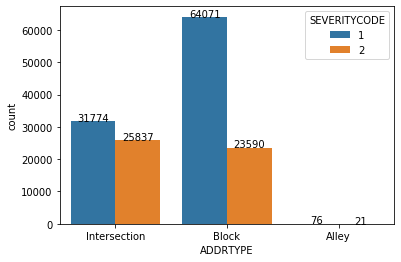

In [14]:
import seaborn as sns 
ax = sns.countplot(x = "ADDRTYPE", hue = "SEVERITYCODE", data = df_req)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(height, xy = (x + 0.5*width, y + height + 0.01), ha = 'center')

### 4.1.2 Relationship between Road Conditions and Accident Counts
It is widely accepted that the conditions of the road is closely related with the risk of an accident. For instance, when roads are slippery from rain, drivers tend to drive slower and more carefully as the braking distance of vehicles increases in such road conditions. However, the data seems to disagree that slippery road conditions suggest higher accident counts. From the figure below, it can be observed that most accidents occur when the road is dry as compared to other road conditions.


In [15]:
df_group = df_req[['ROADCOND', 'SEVERITYCODE', 'INCKEY']].groupby(['ROADCOND', 'SEVERITYCODE'], as_index = False).count()
df_pivot = df_group.pivot(index = 'SEVERITYCODE', columns = 'ROADCOND')
df_pivot

INCKEY                                                        
ROADCOND        Dry  Ice Oil Sand/Mud/Dirt Snow/Slush Standing Water    Wet
SEVERITYCODE                                                               
1             69843  519  13            19        519             35  24973
2             35598  169  10            12        114             15  13530

### 4.1.3 Relationship between Weather Conditions and Accident Count
It is generally accepted that during inclement weather, the risk of accidents while driving increases. This could be due to reduced visibility of other vehicles near the driver, or even slippery roads depending on the weather conditions. However, the data seems to disagree as it is observed that majority of accidents occur during clear weather. There also seems to be no clear indication of which weather condition will result in more severe accidents.


In [16]:
df_group = df_req[['WEATHER', 'SEVERITYCODE', 'INCKEY']].groupby(['WEATHER', 'SEVERITYCODE'], as_index = False).count()
df_pivot = df_group.pivot(index = 'SEVERITYCODE', columns = 'WEATHER')
df_pivot

INCKEY                                               \
WEATHER      Blowing Sand/Dirt  Clear Fog/Smog/Smoke Overcast Partly Cloudy   
SEVERITYCODE                                                                  
1                           28  62425            283    15162             1   
2                           11  31900            139     7607             3   

                                                                        
WEATHER      Raining Severe Crosswind Sleet/Hail/Freezing Rain Snowing  
SEVERITYCODE                                                            
1              17445               14                       57     506  
2               9645                2                       22     119

### 4.1.4 Relationship between Light Conditions and Accident Count
It is also widely agreed that poor light conditions can easily result in higher risks of accidents as the drivers may not be able to see surrounding vehicles due to poor visibility. Similar to Weather Conditions, the data also disagrees with the above statement. It is observed that a lot more accidents occur in environments of good lighting – such as Daylight and Dark with Street Lights On. It is also observed to be difficult to determine which light condition results in more severe accidents.


In [17]:
df_group = df_req[['LIGHTCOND', 'SEVERITYCODE', 'INCKEY']].groupby(['LIGHTCOND', 'SEVERITYCODE'], as_index = False).count()
df_pivot = df_group.pivot(index = 'SEVERITYCODE', columns = 'LIGHTCOND')
df_pivot

INCKEY                           \
LIGHTCOND    Dark - No Street Lights Dark - Street Lights Off   
SEVERITYCODE                                                    
1                                793                      634   
2                                255                      258   

                                                                             \
LIGHTCOND    Dark - Street Lights On Dark - Unknown Lighting  Dawn Daylight   
SEVERITYCODE                                                                  
1                              25665                       3  1272    64342   
2                              12002                       3   685    34548   

                    
LIGHTCOND     Dusk  
SEVERITYCODE        
1             3212  
2             1697

### 4.1.5 Relationship between Junction Types and Accident Count
It can be hypothesised that junction types that are more frequently used will have higher accident counts. The data seems to suggest that accidents occur at Intersections and Mid-Blocks more frequently compared to the other junction types. It can also be seen that accidents occurred at Intersections and Intersection-related Mid-Blocks are usually more severe than accidents at other junction types.


[Text(0, 0, 'At Intersection (intersection related)'),
 Text(0, 0, 'Mid-Block (not related to intersection)'),
 Text(0, 0, 'Mid-Block (but intersection related)'),
 Text(0, 0, 'Driveway Junction'),
 Text(0, 0, 'At Intersection (but not related to intersection)'),
 Text(0, 0, 'Ramp Junction')]

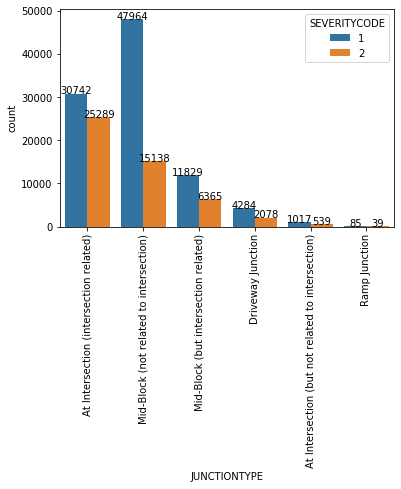

In [18]:
ax = sns.countplot(x = "JUNCTIONTYPE", hue = "SEVERITYCODE", data = df_req)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(height, xy = (x + 0.5*width, y + height + 0.01), ha = 'center')
    
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

### 4.1.6 Relationship between Number of People Involved and Accident Count
The data suggests that the accidents usually involve only a few people and accidents involving 1 person are likely to be more severe. However, there seems to be no concrete correlation between the number of people involved and severity of accidents, possibly due to accidents involving many people being rare and uncommon.


In [19]:
df_group = df_req[['PERSONCOUNT','SEVERITYCODE', 'INCKEY']].groupby(['PERSONCOUNT','SEVERITYCODE'], as_index = False).count()
df_pivot = df_group.pivot(index = 'SEVERITYCODE', columns = 'PERSONCOUNT').astype(object)
df_pivot

INCKEY                                                          \
PERSONCOUNT      0    1      2      3     4     5     6    7    8    9   10   
SEVERITYCODE                                                                  
1              3057  131  60952  19083  7324  3250  1219  444  221   80  47   
2              1558  315  24479  12197  5716  2773  1272  591  264  119  70   

                                                                              \
PERSONCOUNT   11  12  13  14 15 16 17 18 19   20   21 22 23 24 25   26 27 28   
SEVERITYCODE                                                                   
1             19  12   7  12  4  3  3  5  3    4    2  2  1  1  3    4  2  2   
2             25  16  10   7  7  5  8  1  1  NaN  NaN  2  1  1  1  NaN  1  1   

                                                                            \
PERSONCOUNT  29   30   31 32 34   35   36 37   39   41   43   44   47   53   
SEVERITYCODE                                                                 
1             2    1    1  2  1    1    2  2  NaN    1    1    6    3    1   
2             1  NaN  NaN  1  2  NaN  NaN  1    1  NaN  NaN  NaN  NaN  NaN   

                   
PERSONCOUNT    54  
SEVERITYCODE       
1             NaN  
2               1

### 4.1.7 Relationship between State Collision Code Dictionary and Accident Count
The State Collision Code Dictionary (ST_COLCODE) can be found here. From the data, it seems to suggest that accidents involving pedestrians (Code 0 to 4) are often more severe than not. The opposite is true to accidents involving vehicles facing the same direction (Code 10 to 23, 71 to 74 and 81 to 84). For accidents involving cars facing each other, severity of accidents is highly dependent on the specific circumstances of the accident. For instance, accidents where both cars moving toward each other colliding head on tend to be more severe as compared to accidents where one car was turning left and the other was going straight from opposite directions. Some of the other Codes not shown describes rare accidents.


In [20]:
df_req['ST_COLCODE'].astype(int)
df_group = df_req[['ST_COLCODE','SEVERITYCODE', 'INCKEY']].groupby(['ST_COLCODE','SEVERITYCODE'], as_index = False).count()
df_pivot = df_group.pivot(index = 'SEVERITYCODE', columns = 'ST_COLCODE').astype(object)
df_pivot

INCKEY                                                           \
ST_COLCODE        0    1    2   3   4    10    11   12    13    14   15   16   
SEVERITYCODE                                                                   
1                75   34   41   4   1  6660  3337  751  1243  4572  775  745   
2               770  323  571  78  18  4227   530   85   916  3831  240  180   

                                                                               \
ST_COLCODE     19   20   24  25   26  27    28  29   30     32    45   71  72   
SEVERITYCODE                                                                    
1             233  763   70  19  243  61  1858  72  239  10065   209  366  21   
2              28  130  125  14   87  14  1465  13  139    639  1335   23   5   

                                                                            \
ST_COLCODE    73  74   81   82  83  84     0    1     10    11    12    13   
SEVERITYCODE                                                                 
1             34  87  243   12  17  21   210  103  13642  6955  1250  3084   
2             18  69   18  NaN   4  11  1640  674   9139  1155   151  2027   

                                                                               \
ST_COLCODE      14    15    16   19     2    20   24  25   26   27    28   29   
SEVERITYCODE                                                                    
1             8915  1477  1462  368   126  1487  139  57  455  105  3658  150   
2             7099   479   414   45  1372   296  242  37  185   37  3097   36   

                                                                             \
ST_COLCODE      3   30     32   4    45    5    6   7   71  72  73   74   8   
SEVERITYCODE                                                                  
1              18  561  16936  14   310   56   28   1  685  43  70  107   2   
2             117  296   1434  68  2646  343  224  17   59   3  37   65  20   

                               
ST_COLCODE     81  82  83  84  
SEVERITYCODE                   
1             474  18  46  38  
2              49   2  17  20

### 4.1.8 Relationship between Collision Types and Accident Count
It can be observed that some of the accidents that occurred much more frequently such as those involving Parked Cars were generally not as severe as accidents that occurred less, such as those involving Pedestrians and Cycles. It can also be seem that Sideswipes were also usually not very severe. Other Collision Types had a significant amount of accidents resulting in both Severity Codes 1 and 2, such as Left Turns, Rear Ended and Head On.

In [21]:
df_group = df_req[['COLLISIONTYPE', 'SEVERITYCODE', 'INCKEY']].groupby(['COLLISIONTYPE', 'SEVERITYCODE'], as_index = False).count()
df_pivot = df_group.pivot(index = 'SEVERITYCODE', columns = 'COLLISIONTYPE')
df_pivot

INCKEY                                                 \
COLLISIONTYPE Angles Cycles Head On Left Turn Parked Car Pedestrian   
SEVERITYCODE                                                          
1              20302    606    1085      7990      29852        626   
2              13366   4585     853      5330       2572       5631   

                                               
COLLISIONTYPE Rear Ended Right Turn Sideswipe  
SEVERITYCODE                                   
1                  18234       2207     15019  
2                  14114        594      2403

### 4.2 Classification Models

Since the purpose of the model is to categorise accidents into the likely severity codes depending on the characteristics of the accidents, I chose to use classification models over regression models. 

The applications of classification models were quite straightforward as I simply needed to split the original data set into training and test sets and run them through the models. The models applied here are k-Nearest Neighbours, Decision Trees, Support Vector Machines (SVM) and Logistic Regressions. Generally, the metrics used to evaluate the models are Jaccard Index, F1 Score and Logarithmic Loss (Log Loss). 


In [22]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [23]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

df_req['ADDRTYPE_CODE'] = lb_make.fit_transform(df_req['ADDRTYPE'])
df_req['ROADCOND_CODE'] = lb_make.fit_transform(df_req['ROADCOND'])
df_req['WEATHER_CODE'] = lb_make.fit_transform(df_req['WEATHER'])
df_req['LIGHTCOND_CODE'] = lb_make.fit_transform(df_req['LIGHTCOND'])
df_req['JUNCTIONTYPE_CODE'] = lb_make.fit_transform(df_req['JUNCTIONTYPE'])
df_req['COLLISIONTYPE_CODE'] = lb_make.fit_transform(df_req['COLLISIONTYPE'])

X = df_req[['ADDRTYPE_CODE', 'ROADCOND_CODE', 'WEATHER_CODE', 'LIGHTCOND_CODE', 'JUNCTIONTYPE_CODE' , 'COLLISIONTYPE_CODE']].values.astype(float)

y = df_req['SEVERITYCODE'].values.astype(float)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

Train set: (116295, 6) (116295,)
Test set: (29074, 6) (29074,)


### k-Nearest Neighbours

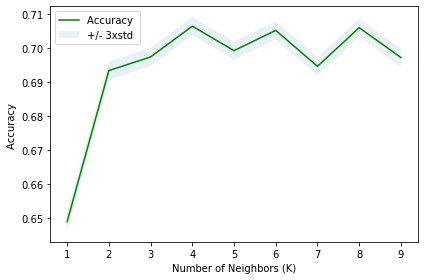

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# finding best k 
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [25]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

print( "From above plot, the best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 
k = mean_acc.argmax()+1 
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat_k = neigh.predict(X_test)

print("Trainset Accuracy:" % metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Testset Accuracy: %.3f" % metrics.accuracy_score(y_test, yhat_k))
print("KNN Jaccard index: %.3f" % jaccard_similarity_score(y_test, yhat_k))
print("KNN F1-score: %.3f" % f1_score(y_test, yhat_k, average='weighted') )


From above plot, the best accuracy was with 0.7065075325032675 with k= 4
Trainset Accuracy:
Testset Accuracy: 0.707
KNN Jaccard index: 0.707
KNN F1-score: 0.670


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


### Decision Trees

In [26]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(X_train,y_train)
yhat_dt = DT_model.predict(X_test)
print("DT Jaccard index: %.3f" % jaccard_similarity_score(y_test, yhat_dt))
print("DT F1-score: %.3f" % f1_score(y_test, yhat_dt, average='weighted') )

DT Jaccard index: 0.698
DT F1-score: 0.624


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


### Support Vector Machine

In [27]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
yhat_svm = clf.predict(X_test)

print("SVM Jaccard index: %.3f" % jaccard_similarity_score(y_test, yhat_svm))
print("SVM F1-score: %.3f" % f1_score(y_test, yhat_svm, average='weighted'))

SVM Jaccard index: 0.684
SVM F1-score: 0.640


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


### Logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
yhat_lr = LR_model.predict(X_test)
yhat_lr_prob = LR_model.predict_proba(X_test)
print("LR Jaccard index: %.3f" % jaccard_similarity_score(y_test, yhat_lr))
print("LR F1-score: %.3f" % f1_score(y_test, yhat_lr, average='weighted'))
print("LR LogLoss: %.3f" % log_loss(y_test, yhat_lr_prob))

LR Jaccard index: 0.657
LR F1-score: 0.524
LR LogLoss: 0.623


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


### 4.2.1 Performance of Classification Models

As seen from the results, Classification model k-Nearest Neighbours is the best model as it had the highest Jaccard Index of 0.707 and highest F1 score of 0.670.

| Evaluation Metrics | k-Nearest Neighbours | Decision Tree | SVM | Logistic Regression |
| ------------------ | -------------------- | ------------- | --- | ---------------------------|
| Jaccard Index | 0.707 | 0.698 | 0.684 | 0.657 |
| F1 Score | 0.670 | 0.624 | 0.640 | 0.524 |
| Log Loss | N.A. | N.A. | N.A. | 0.623 |

## 5. Conclusion <a name = "conclusion"></a>

In this study, I analysed the relationship between the severities of vehicle accidents and the circumstances surrounding the accidents. I identified collision, address, junction types, and road, light and weather conditions to be some of the most important features that affect the severity of an accident. Classification models were built to predict the severity of accidents, so that drivers can use these predictions to gauge the impact of the accident on traffic. This could be useful to drivers as they can change their route of advancements early so avoid being stuck in traffic jams should an accident occur. 

## 6. Future Directions <a name = "futuredirections"></a>

Despite the classification models achieving about 70.7% accuracy, the circumstances around accidents are very dependent on the drivers themselves and how careful and alert they are while driving. Although accidents are not always preventable, we should actively try to reduce the chances of an accident by driving safely, especially when there are conditions that make driving riskier, such as rain and poor visibility. Ultimately, even though this model can help to reduce inconvenience to some, one should not take lives for granted and instead consider the consequences of reckless driving.